In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from constants import (
    PROCESSED_RECORDS_FILENAME,
    INPUT_DATA_FILENAME)
from utils import get_data_path
from preprocessing import preprocessing_initial_text_clean

In [95]:
df = pd.read_csv(join(get_data_path(), INPUT_DATA_FILENAME), encoding="iso-8859-1")
preprocessed_df = pd.read_csv(join(get_data_path(), PROCESSED_RECORDS_FILENAME), encoding="iso-8859-1")

C:\Users\t-wilson\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,7,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,46,47,48,49,50,51,52,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
df = df[['iati.identifier','description', 'title']]

In [97]:
# Remove record in current full dataset with null iati.identifer
df = df[~df["iati.identifier"].str.isspace()]

# If both description and title not NA concatenate them into description column
df.loc[~df["description"].isna() & ~df["title"].isna(), ["description"]] = (
    df["title"] + " " + df["description"]
)

# If description is NA replace with title
df.loc[df["description"].isna(), ["description"]] = df["title"]

In [98]:
df = preprocessing_initial_text_clean(df, 'description')

In [99]:
df['words'] = df['description'].str.count(' ').add(1)
preprocessed_df['words'] = preprocessed_df['description'].str.count(' ').add(1)    

In [100]:
df = df[df['iati.identifier'].isin(preprocessed_df['iati.identifier'])]

In [101]:
print("Initial DF word stats \n{0}".format(df['words'].describe()))

Initial DF word stats 
count    783035.000000
mean         48.899398
std          77.993783
min           1.000000
25%          14.000000
50%          26.000000
75%          49.000000
max       12135.000000
Name: words, dtype: float64


In [102]:
print("Pre-processed DF word stats \n{0}".format(preprocessed_df['words'].describe()))

Pre-processed DF word stats 
count    783035.000000
mean         12.717107
std          21.629170
min           1.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        4110.000000
Name: words, dtype: float64


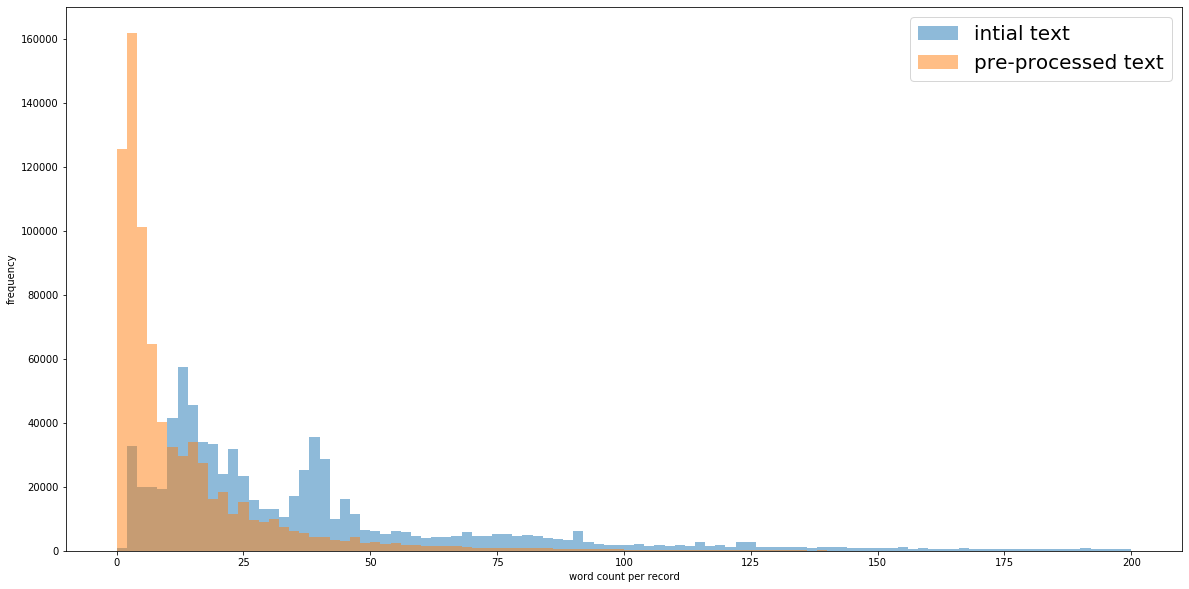

In [123]:
plt.figure(figsize=(20,10))
plt.hist(df['words'], bins=100, range=[0,200], alpha=0.5, label='intial text')
plt.hist(preprocessed_df['words'], bins=100, range=[0,200],alpha=0.5, label='pre-processed text')
plt.legend(prop={'size':20})
plt.xlabel('word count per record')
plt.ylabel('frequency')
plt.show()